# Dataset

In [ ]:
!gdown 1r54BsSUwtnLkXubGYKiCz_TXgd1wtMH1

Downloading...
From: https://drive.google.com/uc?id=1r54BsSUwtnLkXubGYKiCz_TXgd1wtMH1
To: /content/fcn.pkl
100% 37.3M/37.3M [00:00<00:00, 40.7MB/s]


In [ ]:
import pandas as pd

df = pd.read_pickle('fcn.pkl')
df = df[['text','class']]
df

,text,class
0,""" #Verificamos: Atentado contra Jair Bolsonaro...",1
1,"""""""É #FAKE que Cármen Lúcia disse após a eleiç...",1
2,"""Checamos o balanço do primeiro ano de Temer n...",1
3,"""""""É falso que governo federal cortará verbas ...",1
4,É #FAKE que vídeo com calçadão de Bangu alagad...,1
...,...,...
2059,"""""""Defesa de Cunha pede suspensão de prazo das...",-1
2060,"""""""Militares já fizeram sacrifício, mas podem ...",-1
2061,"""""""Bolsonaro diz que Bebianno terá de voltar à...",-1
2062,""" #Verificamos: Laurita Vaz negou habeas corpu...",-1


# Geração de Embedding

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased')

embeddings = model.encode(df.text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
df.at[:,'embedding'] = list(embeddings)
df

,text,class,embedding
0,""" #Verificamos: Atentado contra Jair Bolsonaro...",1,"[-0.02726702, -0.054255713, 0.03504298, -0.030..."
1,"""""""É #FAKE que Cármen Lúcia disse após a eleiç...",1,"[0.01982589, -0.025037637, 0.04633245, -0.0395..."
2,"""Checamos o balanço do primeiro ano de Temer n...",1,"[-0.027151108, 0.016133768, 0.030654162, -0.04..."
3,"""""""É falso que governo federal cortará verbas ...",1,"[-0.026940642, 0.0015602744, 0.0072067054, -0...."
4,É #FAKE que vídeo com calçadão de Bangu alagad...,1,"[-0.009362383, -0.026783248, -0.031098932, -0...."
...,...,...,...
2059,"""""""Defesa de Cunha pede suspensão de prazo das...",-1,"[0.0064115482, -0.0038219725, 0.037522346, -0...."
2060,"""""""Militares já fizeram sacrifício, mas podem ...",-1,"[0.018447323, -0.0059580295, 0.00616156, -0.01..."
2061,"""""""Bolsonaro diz que Bebianno terá de voltar à...",-1,"[0.0015587868, -0.032916505, 0.07084992, -0.04..."
2062,""" #Verificamos: Laurita Vaz negou habeas corpu...",-1,"[0.028915867, -0.006696599, -0.01433126, -0.02..."


# Gerando Grafo

In [ ]:
from sklearn.neighbors import kneighbors_graph
import networkx as nx

A = kneighbors_graph(df.embedding.to_list(), 3)

G = nx.Graph(A)

for node in G.nodes():
  G.nodes[node]['features'] = df.iloc[node]['embedding']
  G.nodes[node]['label'] = 0 if df.iloc[node]['class'] == -1 else 1
  G.nodes[node]['text'] = df.iloc[node]['text']

#Grafo

In [ ]:
list(G.nodes)[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(G.edges)[:10]

[(0, 1345),
 (0, 1783),
 (0, 1676),
 (0, 534),
 (0, 1497),
 (0, 1529),
 (0, 1762),
 (0, 1870),
 (1, 303),
 (1, 395)]

In [ ]:
G.nodes[0]['features'][:10]

array([-0.02726702, -0.05425571,  0.03504298, -0.03019013,  0.02330371,
       -0.04408934,  0.05270011, -0.03046612,  0.05018903,  0.02013912],
      dtype=float32)

In [ ]:
G.nodes[0]['label']

1

In [ ]:
G.nodes[0]['text']

'" #Verificamos: Atentado contra Jair Bolsonaro com checagens em tempo realCandidato do PSL à Presidência da República foi atacado com uma faca durante ato de campanha em Juiz de ForaO candidato à Presidência da República pelo PSL, Jair Bolsonaro, foi esfaqueado na tarde da quinta-feira (6), durante um ato de campanha na cidade de Juiz de Fora, em Minas Gerais. Bolsonaro recebeu atendimento médico no município e se recupera de uma cirurgia. Desde as 17h40, a equipe daLupaestá checando em tempo real as informações que circulam na internet e têm relação com o ataque cometido contra o presidenciável. Esta publicação, que faz parte do projeto de verificação de notíciasdo Facebook, poderá ser atualizada a qualquer momento, ao longo das próximas horas(Nota: Este material não pode ser republicado, reescrito ou redistribuído sem autorização prévia da Lupa).""O suspeito [de esfaquear de Bolsonaro] seria José Adélio Bispo de Oliveira, filiado ao PDT mineiro""Informação divulgada por portais como

In [ ]:
from plotly import graph_objs as go

def show_graph(G):
  ### ARESTAS
  edge_x = []
  edge_y = []

  # adicionando as coordenadas
  for edge in G.edges():
      x0, y0 = G.nodes[edge[0]]['pos']
      x1, y1 = G.nodes[edge[1]]['pos']
      edge_x.append(x0)
      edge_x.append(x1)
      edge_x.append(None)
      edge_y.append(y0)
      edge_y.append(y1)
      edge_y.append(None)

  # definindo cor e estilo das arestas
  edge_trace = go.Scatter(
      x=edge_x, y=edge_y,
      line=dict(width=2, color='#888'),
      hoverinfo='none',
      mode='lines')

  ### VÉRTICES
  node_x = []
  node_y = []

  # adicionando as coordenadas
  for node in G.nodes():
      x, y = G.nodes[node]['pos']
      node_x.append(x)
      node_y.append(y)

  # definindo cor e estilo dos vértices
  node_trace = go.Scatter(
      x=node_x, y=node_y,
      mode='markers',
      hoverinfo='text',
      marker=dict(
          size=10,
          line_width=2))


  node_labels = []
  texts = []
  for node in G.nodes():
    node_labels.append(G.nodes[node]['label'])
    texts.append(G.nodes[node]['text'][:100])

  node_trace.marker.color = node_labels
  node_trace.hovertext = texts

  # visualizando!
  fig = go.Figure(data=[edge_trace, node_trace],
              layout=go.Layout(
                  showlegend=False,
                  hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                  )
  fig.show()

In [ ]:
pos = nx.spring_layout(G,seed=42) # obtém coordenadas dos vértices para visualização
for node in G.nodes():
  G.nodes[node]['pos'] = pos[node]

In [ ]:
show_graph(G)

# Graph Autoencoder

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.3 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np

## Definindo nossa GNN

In [ ]:
from torch_geometric.nn import GCNConv
import torch
import torch_geometric.utils as utils

class GCNEncoder(torch.nn.Module):
  def __init__(self, in_channels, out_channels): #  tamanho da entrada e tamanho da saida
    super().__init__()
    self.conv1 = GCNConv(in_channels, 2 * out_channels) #definindo a camada
    self.conv2 = GCNConv(2 * out_channels, out_channels)  #definindo a camada

  def forward(self, H0, A): # entra a primeira represenhtacao, adjacencia
    H1 = self.conv1(H0, A).relu() # 1 camda
    H2 = self.conv2(H1, A) # 2 canada

    return H2

def train(gae, optimizer, graph):

  gae.train() # padrao torch geometric
  optimizer.zero_grad() # padrao torch geometric

  Hl = gae.encode(graph.features.float(), graph.edge_index) # 1 iteracao, entra rep inicial e matrix adjacecia

  loss = gae.recon_loss(Hl, graph.edge_index) # Hl x Hl transposto == A

  loss.backward() # devirava da funcao de perda -- aprendizado dos pesos W
  optimizer.step() # padrao torch geometric

  return float(loss), Hl

## Exexutando treinando da GNN

In [ ]:
import torch_geometric.utils as utils
from torch_geometric.nn import GAE

random.seed(81) # sementes
np.random.seed(81) # sementes
torch.manual_seed(81) # sementes
torch.cuda.manual_seed(81) # sementes

device = torch.device('cuda') # sementes

dataset = utils.from_networkx(G) # grafo nx para grafo torch geometric

in_channels, out_channels = len(dataset.features[0]), 2 # Interpretabilidade

gae = GAE(GCNEncoder(in_channels, out_channels)) # define a nossa GAE

gae = gae.to(device) # modelo para gpu
gae = gae.float() # torch padrao

dataset = dataset.to(device) # grafo para gpu

optimizer = torch.optim.Adam(gae.parameters(), lr = 0.01) # define LR

epochs = 12

losses = []
embs_list = []

for epoch in range(epochs):
  loss, Hl = train(gae, optimizer, dataset) # treina
  losses.append(loss) # salva loss
  embs_list.append(Hl)  # salva representacao

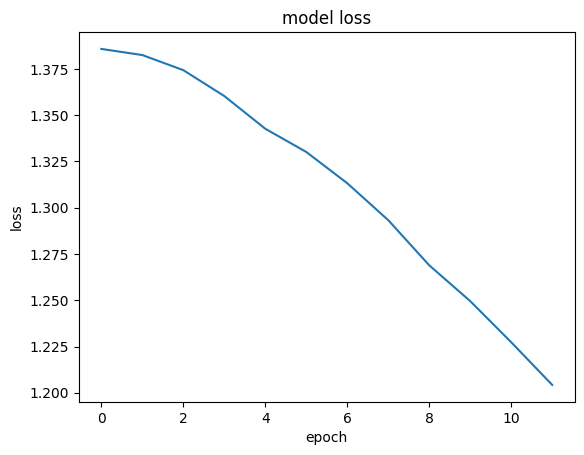

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

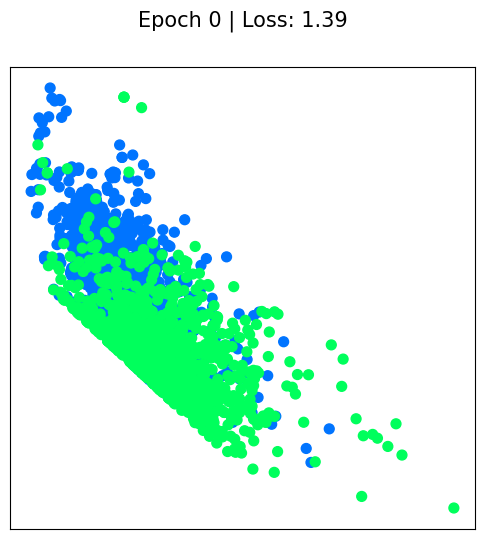

In [ ]:
from IPython.display import HTML
from matplotlib import animation

labels_plot = np.array([G.nodes[node]['label'] for node in G.nodes])

def animate(i):
    embed = embs_list[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], s=50, c=labels_plot, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f}', fontsize=15, pad=30)

fig = plt.figure(figsize=(6, 6))

plt.axis('off')
ax = fig.add_subplot()
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

anim = animation.FuncAnimation(fig, animate, np.arange(0, epochs, 1), interval=800, repeat=True)
html = HTML(anim.to_html5_video())

In [ ]:
display(html)

## Obtendo representações da GNN

In [ ]:
for node in G.nodes():
  G.nodes[node]['features_gae'] = Hl[node].detach().cpu().numpy()

In [ ]:
G.nodes[0]['features_gae']

array([0.469846  , 0.37012413], dtype=float32)

## Separando nossas noticias para avaliar

In [ ]:
x_int = []
x_out = []

for node in G.nodes():
  if G.nodes[node]['label'] == 1:
    x_int.append(G.nodes[node]['features_gae'])
  else:
    x_out.append(G.nodes[node]['features_gae'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x_int, test_size=0.1, random_state=81) # separando em treino e teste

# One-Class Learning

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM as OCSVM

ocsvm = OCSVM(kernel='rbf', nu=0.2) # criando algoritmo

ocsvm.fit(x_train) # treinando algoritmo

y_int_pred = ocsvm.predict(x_test) # predizendo novos exemplos
y_out_pred = ocsvm.predict(x_out) # predizendo novos exemplos

y_true = np.concatenate([[1] * len(x_test), [-1] * len(x_out)])
y_pred = np.concatenate([y_int_pred, y_out_pred])

print(classification_report(y_true, y_pred)) # avaliando

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98      1020
           1       0.75      0.90      0.82       105

    accuracy                           0.96      1125
   macro avg       0.87      0.94      0.90      1125
weighted avg       0.97      0.96      0.96      1125



# Vizualização


## Função de decisão


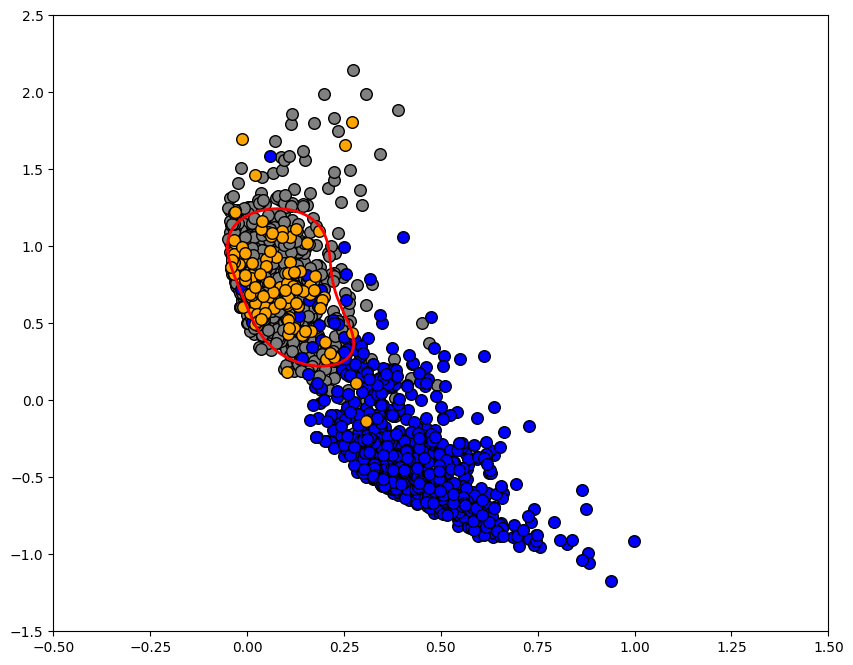

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.scatter(np.array(x_train)[:, 0], np.array(x_train)[:, 1], c='gray', s=70, edgecolors='k') #treino

plt.scatter(np.array(x_out)[:, 0], np.array(x_out)[:, 1], c='blue', s=70, edgecolors='k')

plt.scatter(np.array(x_test)[:, 0], np.array(x_test)[:, 1], c='orange', s=70, edgecolors='k') #teste interesse

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

Z = ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red') #esfera

plt.xlim((-0.5, 1.5))
plt.ylim((-1.5, 2.5))
plt.show()

## Modelage em grafo com embeddings na posição

In [ ]:
for node in G.nodes():
  G.nodes[node]['pos'] = G.nodes[node]['features_gae']

In [ ]:
show_graph(G)

#GNN de duas classes?


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size = 0.1, random_state = 81, stratify=df['class'])

for i in df_train.index:
  G.nodes[i]['train'] = 1
  G.nodes[i]['val'] = 0

for i in df_val.index:
  G.nodes[i]['train'] = 0
  G.nodes[i]['val'] = 1

In [ ]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 14.3 MB/s eta 0:00:00


In [ ]:
from torch_geometric.nn import GCNConv
import torch
import torch.nn as nn
from torcheval.metrics.functional import multiclass_f1_score
import torch_geometric.utils as utils
from sklearn.metrics import classification_report

class GCN(torch.nn.Module):
  def __init__(self, in_channels, out_channels):
    super().__init__()
    self.conv1 = GCNConv(in_channels, 2 * out_channels)
    self.conv2 = GCNConv(2 * out_channels, out_channels)
    self.classification = nn.Linear(out_channels, 2)

  def forward(self, H0, A):
    H1 = self.conv1(H0, A).relu()
    H2 = self.conv2(H1, A).relu()

    return self.classification(H2), H2

def train_model(gcn, optmizer, graph, criterion):

  gcn.train()
  optmizer.zero_grad()

  predictions, Hl = gcn(graph.features, graph.edge_index)

  loss = criterion(predictions[mask], graph.label[mask])

  loss.backward()
  optmizer.step()

  return float(loss), Hl

def eval_node_classifier(gcn, mask, graph):
    gcn.eval()
    scores, _ = gcn(graph.features, graph.edge_index)
    pred = scores.argmax(dim=1)
    f1_macro = multiclass_f1_score(pred[mask], graph.label[mask], num_classes=2, average="macro")
    return f1_macro, nn.Softmax(dim=1)(scores), pred

In [ ]:
random.seed(81)
np.random.seed(81)
torch.manual_seed(81)
torch.cuda.manual_seed(81)

criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')
graph = utils.from_networkx(G)
in_channels, out_channels = len(graph.features[0]), 64
gcn = GCN(in_channels, out_channels)
gcn = gcn.to(device)
gcn = gcn.float()
graph = graph.to(device)
optmizer = torch.optim.Adam(gcn.parameters(), lr = 0.001)
epochs = 2000
losses = []
embs_list = []

for epoch in range(epochs):
  mask = torch.gt(graph.train, 0)
  loss, Hl = train_model(gcn, optmizer, graph, criterion)
  losses.append(loss)
  embs_list.append(Hl)
  if epoch % 10 == 0 or epoch == epochs - 1:
     f1, scores, y_pred = eval_node_classifier(gcn, torch.gt(graph.val, 0), graph)
     print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val F1: {f1:.3f}')
print(classification_report(y_pred[torch.gt(graph.val, 0 )].detach().cpu().numpy(), graph.label[torch.gt(graph.val, 0 )].detach().cpu().numpy()))

Epoch: 000, Train Loss: 0.694, Val F1: 0.337
Epoch: 010, Train Loss: 0.609, Val F1: 0.952
Epoch: 020, Train Loss: 0.414, Val F1: 0.961
Epoch: 030, Train Loss: 0.197, Val F1: 0.966
Epoch: 040, Train Loss: 0.103, Val F1: 0.966
Epoch: 050, Train Loss: 0.086, Val F1: 0.966
Epoch: 060, Train Loss: 0.082, Val F1: 0.966
Epoch: 070, Train Loss: 0.078, Val F1: 0.966
Epoch: 080, Train Loss: 0.074, Val F1: 0.966
Epoch: 090, Train Loss: 0.071, Val F1: 0.966
Epoch: 100, Train Loss: 0.069, Val F1: 0.966
Epoch: 110, Train Loss: 0.066, Val F1: 0.966
Epoch: 120, Train Loss: 0.064, Val F1: 0.966
Epoch: 130, Train Loss: 0.062, Val F1: 0.976
Epoch: 140, Train Loss: 0.059, Val F1: 0.976
Epoch: 150, Train Loss: 0.057, Val F1: 0.976
Epoch: 160, Train Loss: 0.054, Val F1: 0.976
Epoch: 170, Train Loss: 0.052, Val F1: 0.976
Epoch: 180, Train Loss: 0.049, Val F1: 0.976
Epoch: 190, Train Loss: 0.047, Val F1: 0.976
Epoch: 200, Train Loss: 0.044, Val F1: 0.976
Epoch: 210, Train Loss: 0.041, Val F1: 0.981
Epoch: 220

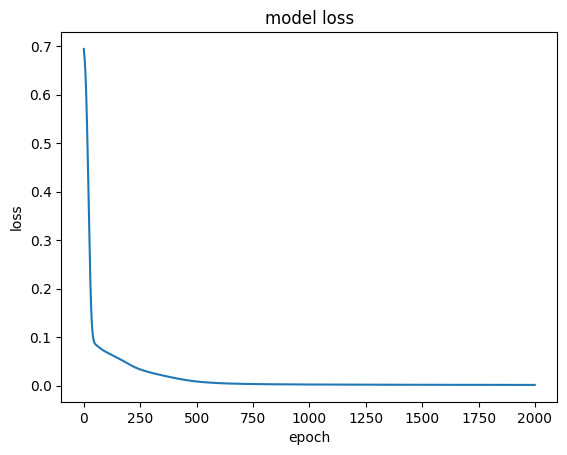

In [ ]:
plt.plot(losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
for node in G.nodes():
  G.nodes[node]['pos'] = Hl[node].detach().cpu().numpy()

In [ ]:
show_graph(G)